In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

import swifter
import spacy
import ssl
from spacy import displacy
import pandas as pd
from spacy.lang.en import English
from spacy.pipeline import EntityRuler
from sklearn.metrics import accuracy_score
from spacy.matcher import Matcher
from spacy.pipeline import EntityRuler

from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from fuzzywuzzy import process, fuzz

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
stop=set(stopwords.words('english'))
#nltk.download('stopwords')

from sklearn.linear_model import LogisticRegression

from joblib import Parallel, delayed

from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt

import seaborn as sns

import re

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

global cls_acc
cls_acc = 0
global cls_time
cls_time = 0
import time
import io

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from IPython.display import display
from IPython.display import display

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import seaborn as sns

# EDA - Exploratory Data Anaysis
- Importing the original dataset
- Checking the number of rows and columns of the dataset
- Checking the total of null values per columns
- Checking the total of unique values per column

In [2]:
#df = pd.read_parquet('C:/Users/Olimpio.Dasilva/Desktop/MACHINE LEARNING/DATA/reporting_ncr_all_transactions_202302131044.parquet')
df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202303081506.csv')
#df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202303081406.csv')
pd.set_option('display.max_colwidth', None)
df = df.sample(10000)
df.head(5)

,fi_id,account_id,transaction_id,amount,currency,txn_desc1,txn_desc2,region,transaction_timestamp,merchant_id,merchant_name,payment_agent,payment_agent_id,extract_date,filename,name
116120,DI7001,Af2e66dcf683a3db1b2e15c128fb73065,Tc1f933c105bc34d6a8e384a6165ce0b4,66.68,USD,DDA PUR WAL-MART #,3701 PORTAGE ROAD SOUTH BEND IN **,NaN,2022-10-03,13085.0,WALMART,Unknow Payment Agent,NaN,2022-10-08,FTS_CSLK_TRANSAC_20221007_100006.csv,1st Source Bank
578943,DI3648,A8cda8bc8886335e5aef503255e8d47cb,T165ac547d60a3828903b3ab75b1e4073,1.99,USD,DBT PURCHASE ON 11/12 @ 17:55,SAFEWAY #0526 KIRKLAND WA CARD NBR: -0216,NaN,2022-11-14,12429.0,SAFEWAY,Unknow Payment Agent,NaN,2022-11-17,FTS_CSLK_TRANSAC_20221116_100006.csv,Harborstone Credit Union
904417,DI3337,Aa9312d2a2a1b30bd825916e46d6b7318,T54ffc905ff3235dda852ddf7708b9141,1.08,USD,Withdrawal #**,CIRCLE K 09183 CHANDLER AZ,AZ,2022-08-08,10628.0,CIRCLE K,Unknow Payment Agent,NaN,2022-08-11,FTS_CSLK_TRANSAC_20220810_100032.csv,Arizona Federal Credit Union
1465425,DI1690,A321ffcdc30de3e16801ad183b2fcbe92,T47e418300bac35f6ac4a0a317c9b253b,178.93,USD,POS PURCHASE WM SUPERC Wal-Mart,Sup SPRINGHILL LA * *****8271 02/19,NaN,2023-02-21,13085.0,WALMART,Unknow Payment Agent,NaN,2023-02-25,FTS_CSLK_TRANSAC_20230224_100006.csv,Citizens National Bank
434009,DI8054,A10f2855997f83c5b8e65837df155d54d,T59f5071292913b5a9d8191160def8a34,52.40,USD,Withdrawal WM SUPERCENTER #174,COCOA US %% Card 25 #4758 %% MCC 5411 #*,NaN,2023-03-04,13085.0,WALMART,Unknow Payment Agent,NaN,2023-03-08,FTS_CSLK_TRANSAC_20230307_100007.csv,Community Credit Union of Florida


In [3]:
print('Total number of rows and columns:', df.shape)

Total number of rows and columns: (10000, 16)


In [4]:
print('Total number of null values per column:')
df.isnull().sum()
#df.dropna(inplace=True)

Total number of null values per column:


fi_id                       0
account_id                  0
transaction_id              0
amount                      0
currency                    0
txn_desc1                   0
txn_desc2                 807
region                   8438
transaction_timestamp       0
merchant_id                 0
merchant_name               0
payment_agent               0
payment_agent_id         9528
extract_date                0
filename                    0
name                        0
dtype: int64

In [5]:
print('Total number of unique values per column:')
df.nunique()

Total number of unique values per column:


fi_id                      163
account_id                9219
transaction_id           10000
amount                    5270
currency                     1
txn_desc1                 3617
txn_desc2                 8367
region                      43
transaction_timestamp      502
merchant_id                658
merchant_name              661
payment_agent               13
payment_agent_id            20
extract_date               474
filename                   514
name                       163
dtype: int64

# Unknown Merchant Names
- Selecting dataset with unknown merchants only
- Checking the number of rows and columns

In [6]:
df_unknown_merchs = df.copy(deep=True)
df_unknown_merchs = df_unknown_merchs[df["merchant_name"].str.contains("Unknow Merchant") == True]
print('Total number of rows and columns:', df_unknown_merchs.shape)

Total number of rows and columns: (0, 16)


# Known Merchant Names
- Selecting known merchants only 
- Checking the number of rows/transactions
- Checking the total number of merchants
- Checking the total number of occurrences per merchant
- Concatenated the transaction details columns
- Defined a function for word cloud for top merchants
- Defined a function for N-gram for top merchants with combined names
- Defined a function to check occurence of merchants in transaction columns

In [7]:
# Selecting only known merchants names from the original dataset
df_known_merchs = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name']].copy(deep=True)
df_known_merchs = df_known_merchs[df["merchant_name"].str.contains("Unknow Merchant") == False]
#######
df_known_merchs_cp2 = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name']].copy(deep=True)
df_known_merchs_cp2 = df_known_merchs_cp2[df["merchant_name"].str.contains("Unknow Merchant") == False]

#df_known_merchs = df_known_merchs.head(50)

In [8]:
print('Number of transactions with known merchant names:\n',len(df_known_merchs) )

Number of transactions with known merchant names:
 10000


In [9]:
print('Total number of known merchants:\n',len(df_known_merchs.merchant_name.unique()))

Total number of known merchants:
 661


In [10]:
print('Total number of occurences per merchant name:\n',(df_known_merchs.merchant_name).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name:
 AMAZON.COM         8.3%
WALMART            6.8%
MCDONALD'S         3.3%
APPLE STORE        2.7%
TARGET             2.4%
                   ... 
TUESDAY MORNING    0.0%
BEN & JERRY'S      0.0%
SEA LIFE           0.0%
NAUTICA            0.0%
TURKEY HILL        0.0%
Name: merchant_name, Length: 661, dtype: object


In [11]:
# Concatenating transaction descriptions columns
df_known_merchs["TRANSACTION_DETAILS"] = df_known_merchs['txn_desc1'].astype(str) +" %%%%% "+ df_known_merchs['txn_desc2'].astype(str)

In [12]:
df_known_merchs.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,TRANSACTION_DETAILS
116120,Tc1f933c105bc34d6a8e384a6165ce0b4,DDA PUR WAL-MART #,3701 PORTAGE ROAD SOUTH BEND IN **,Unknow Payment Agent,WALMART,DDA PUR WAL-MART # %%%%% 3701 PORTAGE ROAD SOUTH BEND IN **
578943,T165ac547d60a3828903b3ab75b1e4073,DBT PURCHASE ON 11/12 @ 17:55,SAFEWAY #0526 KIRKLAND WA CARD NBR: -0216,Unknow Payment Agent,SAFEWAY,DBT PURCHASE ON 11/12 @ 17:55 %%%%% SAFEWAY #0526 KIRKLAND WA CARD NBR: -0216
904417,T54ffc905ff3235dda852ddf7708b9141,Withdrawal #**,CIRCLE K 09183 CHANDLER AZ,Unknow Payment Agent,CIRCLE K,Withdrawal #** %%%%% CIRCLE K 09183 CHANDLER AZ
1465425,T47e418300bac35f6ac4a0a317c9b253b,POS PURCHASE WM SUPERC Wal-Mart,Sup SPRINGHILL LA * *****8271 02/19,Unknow Payment Agent,WALMART,POS PURCHASE WM SUPERC Wal-Mart %%%%% Sup SPRINGHILL LA * *****8271 02/19
434009,T59f5071292913b5a9d8191160def8a34,Withdrawal WM SUPERCENTER #174,COCOA US %% Card 25 #4758 %% MCC 5411 #*,Unknow Payment Agent,WALMART,Withdrawal WM SUPERCENTER #174 %%%%% COCOA US %% Card 25 #4758 %% MCC 5411 #*


In [13]:
def word_cloud(a):
    # Word cloud for more frequent merchant names
    text = " ".join(i for i in a)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(7,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

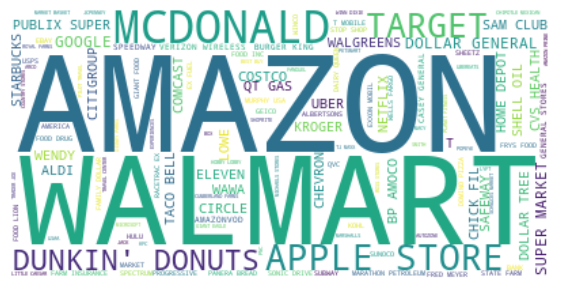

In [14]:
# Copy of the afs merchant names column
df_known_merchs['AFS_PAYMENT_AGENTS'] = df_known_merchs['payment_agent'] 
# Copy of the afs merchant names column
df_known_merchs['AFS_MECHANT_NAMES'] = df_known_merchs['merchant_name']
# Droping original cols
df_known_merchs = df_known_merchs.drop(['txn_desc1', 'txn_desc2','payment_agent','merchant_name'], axis=1)

# Word cloud for more frequent merchant names
word_cloud(df_known_merchs.AFS_MECHANT_NAMES)

In [15]:
df_known_merchs

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES
116120,Tc1f933c105bc34d6a8e384a6165ce0b4,DDA PUR WAL-MART # %%%%% 3701 PORTAGE ROAD SOUTH BEND IN **,Unknow Payment Agent,WALMART
578943,T165ac547d60a3828903b3ab75b1e4073,DBT PURCHASE ON 11/12 @ 17:55 %%%%% SAFEWAY #0526 KIRKLAND WA CARD NBR: -0216,Unknow Payment Agent,SAFEWAY
904417,T54ffc905ff3235dda852ddf7708b9141,Withdrawal #** %%%%% CIRCLE K 09183 CHANDLER AZ,Unknow Payment Agent,CIRCLE K
1465425,T47e418300bac35f6ac4a0a317c9b253b,POS PURCHASE WM SUPERC Wal-Mart %%%%% Sup SPRINGHILL LA * *****8271 02/19,Unknow Payment Agent,WALMART
434009,T59f5071292913b5a9d8191160def8a34,Withdrawal WM SUPERCENTER #174 %%%%% COCOA US %% Card 25 #4758 %% MCC 5411 #*,Unknow Payment Agent,WALMART
...,...,...,...,...
181448,T4567b5f9e3c73e2dbab3cf715bd46e95,Withdrawal Visa Check Card %%%%% LOVE'S #359 EMERSON GA Date 02/26/23 ***87582 5541 %% MCC 5541,Unknow Payment Agent,LOVES TRAVEL & COUNTRY STORES
444398,Tece276f75bd03421b3d1358ca3f2c71d,Withdrawal SEARS ONLINE %%%%% TYPE: PAYMENT ID: CITICTP CO: SEARS ONLINE NAME: KELLY A BALLIET %% ACH ECC WEB %% ACH Trace **666,Unknow Payment Agent,SEARS
1467831,T67b90ccb9af8350395b8f574a75fd03f,Purchase KWIK SHOP #0713 5700 %%%%% SWTOPEKA KSUS,Unknow Payment Agent,KWIK SHOP
1402431,T57fccd1827fc3b6d8d10eadbe48c8006,Withdrawal Debit Card %%%%% STARBUCKS 800-782-7282 800-782-7282 WA Date 11/16/22 ***75874 5814,Unknow Payment Agent,STARBUCKS


In [16]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

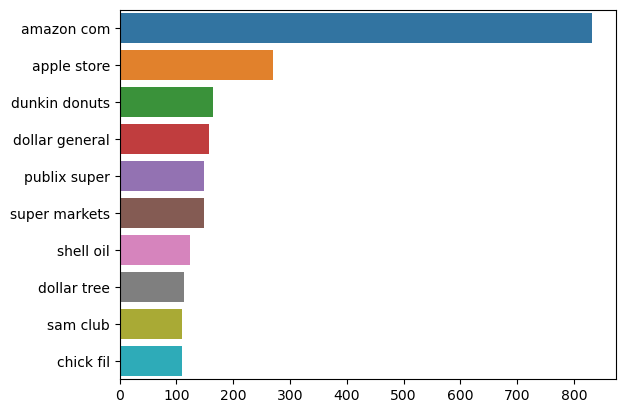

In [17]:
top_n_bigrams=get_top_ngram(df_known_merchs['AFS_MECHANT_NAMES'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x);

In [18]:
def check_names(merchant, t_details):
    
    # Variations for merchant name column
    merchant_1 = merchant
    merchant_2 = merchant_1.lower()
    merchant_3 = re.sub("[\\\\/:*?'#<>|-]", '', merchant_2)
    merchant_4 = re.sub(' ', '', merchant_2)
    merchant_5 = re.sub('[.com/%]', ' ', merchant_2)
    merch_list = merchant_1.split() + merchant_2.split() + merchant_3.split() + merchant_4.split() + merchant_5.split() + merchant.split()
    
    # Variations for transaction details column
    t_details_1 = t_details
    t_details_2 = t_details.lower()
    t_details_3 = re.sub("[\\\\/:*?'#<>|-]", '', t_details_2)
    t_details_4 = re.sub("[.com/%]", " ",t_details_2)
    t_details_5 = re.sub("[\\\\/:*?'#<>|-]", ' ', t_details_2)
    date_pattern = re.sub("\d{1,2}/\d{1,2}(/\d{2,4})?", "", t_details_2)
    
    # Merchants mentioned in transaction description w/ variations
    comp_1 = re.sub("Prime", "AMAZONVOD",t_details_1)
    comp_2 = re.sub("VZWRLSS", "VERIZON WIRELESS",t_details_1)
    comp_3 = re.sub("WM", "WALMART",t_details_1)
    
    #################################
    
    #################################
    
    # Creating a list of conversions to check if merchants are mentioned in transation descriotions 
    details_lis = t_details_2.split()
    details_lis_1 = t_details_1.split() + t_details_2.split() + t_details_3.split() + details_lis + t_details_4.split() + t_details_5.split() + comp_1.split() + comp_2.split() + comp_3.split() + t_details.split() + date_pattern.split()
    
    # Conditions to check if words are in transaction strings
    if (merchant in t_details_3 or t_details_3 in merchant or           #VEEEEEERRRR  merchant in t_details_3 or t_details_3 in merchant or 
        (merchant_2 in t_details_3 or t_details_3 in merchant_2) or 
        (merchant_3 in t_details_3 or t_details_3 in merchant_3) or
        (merchant_4 in t_details_3 or t_details_3 in merchant_4) or
        (merchant_1 in t_details_3 or t_details_1 in merchant_4) or
        (merchant_1 in details_lis_1 or merchant_4 in details_lis)or
        (any(item in merch_list for item in details_lis_1)) or
        (merchant_1[:4] in t_details_1)):
        return True
    else:
        return False
    

- Checked the occurrence of merchants in the first and secod transation colums separately
- Checked the total number of occurrences per column

In [19]:
# Merchants in the txt_1 or txt_2 columns
df_known_merchs_cp2['txn_desc2'] = df_known_merchs_cp2['txn_desc2'].astype(str)
df_known_merchs_cp2['txn_desc1'] = df_known_merchs_cp2['txn_desc1'].astype(str)
df_known_merchs_cp2['merchant_name'] = df_known_merchs_cp2['merchant_name'].astype(str)
df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] = df_known_merchs_cp2.apply(lambda x: check_names(x.merchant_name, x.txn_desc1), axis=1) # OR txn_desc2
df_known_merchs_cp2.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,CHECK_MERCH_TRA_cp
116120,Tc1f933c105bc34d6a8e384a6165ce0b4,DDA PUR WAL-MART #,3701 PORTAGE ROAD SOUTH BEND IN **,Unknow Payment Agent,WALMART,True
578943,T165ac547d60a3828903b3ab75b1e4073,DBT PURCHASE ON 11/12 @ 17:55,SAFEWAY #0526 KIRKLAND WA CARD NBR: -0216,Unknow Payment Agent,SAFEWAY,False
904417,T54ffc905ff3235dda852ddf7708b9141,Withdrawal #**,CIRCLE K 09183 CHANDLER AZ,Unknow Payment Agent,CIRCLE K,False
1465425,T47e418300bac35f6ac4a0a317c9b253b,POS PURCHASE WM SUPERC Wal-Mart,Sup SPRINGHILL LA * *****8271 02/19,Unknow Payment Agent,WALMART,True
434009,T59f5071292913b5a9d8191160def8a34,Withdrawal WM SUPERCENTER #174,COCOA US %% Card 25 #4758 %% MCC 5411 #*,Unknow Payment Agent,WALMART,True


In [20]:
print('Total of transactions with known merchants:\n',len(df_known_merchs_cp2))

Total of transactions with known merchants:
 10000


In [21]:
print('Merchant name occurrence in txn_desc1 column:\n',(df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] == True).sum())

Merchant name occurrence in txn_desc1 column:
 4272


In [22]:
df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] = df_known_merchs_cp2.apply(lambda x: check_names(x.merchant_name, x.txn_desc2), axis=1)
print('Merchant name occurrence in txn_desc2 column:\n',(df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] == True).sum())

Merchant name occurrence in txn_desc2 column:
 7009


- Checked occurrence of merchants in concatenated transaction column
- Created CHECK_MERCH_TRA to inspect occurrences
- Checked total number of occurences in merchant details coolumn

In [23]:
# Checking if merchant names are mentioned in the transaction description
df_known_merchs['CHECK_MERCH_TRA'] = df_known_merchs.apply(lambda x: check_names(x.AFS_MECHANT_NAMES, x.TRANSACTION_DETAILS), axis=1)
df_known_merchs.head(5)

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
116120,Tc1f933c105bc34d6a8e384a6165ce0b4,DDA PUR WAL-MART # %%%%% 3701 PORTAGE ROAD SOUTH BEND IN **,Unknow Payment Agent,WALMART,True
578943,T165ac547d60a3828903b3ab75b1e4073,DBT PURCHASE ON 11/12 @ 17:55 %%%%% SAFEWAY #0526 KIRKLAND WA CARD NBR: -0216,Unknow Payment Agent,SAFEWAY,True
904417,T54ffc905ff3235dda852ddf7708b9141,Withdrawal #** %%%%% CIRCLE K 09183 CHANDLER AZ,Unknow Payment Agent,CIRCLE K,True
1465425,T47e418300bac35f6ac4a0a317c9b253b,POS PURCHASE WM SUPERC Wal-Mart %%%%% Sup SPRINGHILL LA * *****8271 02/19,Unknow Payment Agent,WALMART,True
434009,T59f5071292913b5a9d8191160def8a34,Withdrawal WM SUPERCENTER #174 %%%%% COCOA US %% Card 25 #4758 %% MCC 5411 #*,Unknow Payment Agent,WALMART,True


In [24]:
# Merchant name in the transaction description
print('Merchant name in the transaction description:\n',(df_known_merchs['CHECK_MERCH_TRA'] == True).sum() )

Merchant name in the transaction description:
 9856


- Created a copy to encode CHECK_MERCH_TRA results
- Created a chart to compare the results
- Created a word cloud of AFS_MECHANT_NAMES to get most frequen merchants
- Checked how many times merchants are mentioned in transaction details
- Checked how many times merchants are not in transaction details
- Created word cloud for merchants not in transaction details 

In [25]:
df_known_merchs_cp = df_known_merchs[['transaction_id','TRANSACTION_DETAILS','AFS_PAYMENT_AGENTS','AFS_MECHANT_NAMES','CHECK_MERCH_TRA']].copy(deep=True)
df_known_merchs_cp.head()

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
116120,Tc1f933c105bc34d6a8e384a6165ce0b4,DDA PUR WAL-MART # %%%%% 3701 PORTAGE ROAD SOUTH BEND IN **,Unknow Payment Agent,WALMART,True
578943,T165ac547d60a3828903b3ab75b1e4073,DBT PURCHASE ON 11/12 @ 17:55 %%%%% SAFEWAY #0526 KIRKLAND WA CARD NBR: -0216,Unknow Payment Agent,SAFEWAY,True
904417,T54ffc905ff3235dda852ddf7708b9141,Withdrawal #** %%%%% CIRCLE K 09183 CHANDLER AZ,Unknow Payment Agent,CIRCLE K,True
1465425,T47e418300bac35f6ac4a0a317c9b253b,POS PURCHASE WM SUPERC Wal-Mart %%%%% Sup SPRINGHILL LA * *****8271 02/19,Unknow Payment Agent,WALMART,True
434009,T59f5071292913b5a9d8191160def8a34,Withdrawal WM SUPERCENTER #174 %%%%% COCOA US %% Card 25 #4758 %% MCC 5411 #*,Unknow Payment Agent,WALMART,True


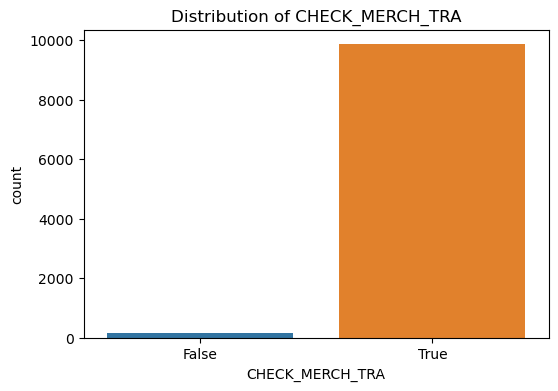

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x="CHECK_MERCH_TRA", data=df_known_merchs_cp)
plt.title("Distribution of CHECK_MERCH_TRA");

In [27]:
print('Percentage of merchant names in T details or not (1/0):\n',(df_known_merchs_cp.CHECK_MERCH_TRA).value_counts(normalize=True).mul(100).round(1).astype(str) + '%');

Percentage of merchant names in T details or not (1/0):
 True     98.6%
False     1.4%
Name: CHECK_MERCH_TRA, dtype: object


In [28]:
# Number of merchant names in transaction details
df_check_true = pd.DataFrame()
df_check_true = df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA'] == True]
print('Number of merchant names in transaction details:\n',len(df_check_true))

Number of merchant names in transaction details:
 9856


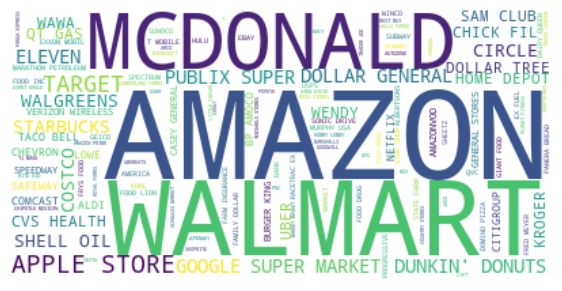

In [29]:
# Word cloud for more frequent merchant names WHEN merchant name is in transaction description

word_cloud(df_check_true.AFS_MECHANT_NAMES)

In [30]:
print('Total number of occurences per merchant name:\n',(df_check_true.AFS_MECHANT_NAMES).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name:
 AMAZON.COM           8.3%
WALMART              6.9%
MCDONALD'S           3.4%
APPLE STORE          2.7%
TARGET               2.4%
                     ... 
CHOPT                0.0%
VOGUE                0.0%
FRONTIER AIRLINES    0.0%
VITAMIN SHOPPE       0.0%
TURKEY HILL          0.0%
Name: AFS_MECHANT_NAMES, Length: 654, dtype: object


In [31]:
print('Number of merchant names NOT in the transaction description:\n',(df_known_merchs['CHECK_MERCH_TRA'] == False).sum())

Number of merchant names NOT in the transaction description:
 144


In [32]:
# Number of merchant names not in transaction details
df_check_false = pd.DataFrame()
df_check_false = df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA'] == False]
#print('Number of merchant names NOT in the transaction description:\n', len(df_check_false))

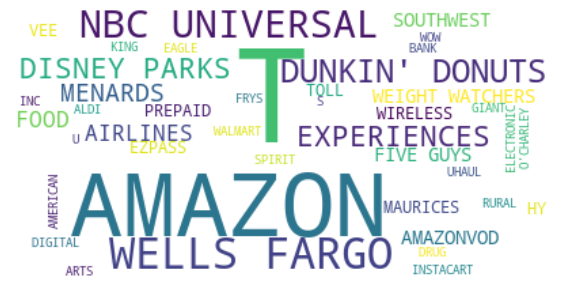

In [33]:
# Word cloud for more frequent merchant names WHEN merchant name is NOT in transaction description
word_cloud(df_check_false.AFS_MECHANT_NAMES)

In [34]:
print('Total number of occurences per merchant name WHEN merchant name is NOT in transation details:\n', (df_check_false.AFS_MECHANT_NAMES).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name WHEN merchant name is NOT in transation details:
 AT&T                            34.7%
AMAZON.COM                      12.5%
WELLS FARGO                      8.3%
NBC UNIVERSAL                    6.9%
DUNKIN' DONUTS                   6.2%
DISNEY PARKS AND EXPERIENCES     4.9%
MENARDS                          3.5%
SOUTHWEST AIRLINES               2.1%
WEIGHT WATCHERS                  2.1%
AMAZONVOD                        2.1%
FIVE GUYS                        2.1%
EZPASS PREPAID TOLL              1.4%
HY-VEE-FOODS                     1.4%
MAURICES                         1.4%
AT&T WIRELESS                    1.4%
GIANT FOOD INC                   0.7%
SPIRIT AIRLINES                  0.7%
INSTACART                        0.7%
WALMART                          0.7%
AMERICAN EAGLE                   0.7%
ELECTRONIC ARTS - DIGITAL        0.7%
FRYS FOOD & DRUG                 0.7%
ALDI                             0.7%
WOW!                           

- Merchant names not mentioned in transaction description

In [35]:
# Merchant names not mentioned in transaction description
df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA']==False] 


,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
1179751,Ta2c78d76d8ba3455814c70a4feea7e32,ATT PAYMENT %%%%% nan,Unknow Payment Agent,AT&T,False
939348,Tf3d06f04b86b3c7ba2f90fa0271a39f8,ATT* BILL PAYMENT *0500 %%%%% TXUS : POS Transaction,Unknow Payment Agent,AT&T,False
589952,T34ff39c30f6a3258bc886b6011394180,XX8599 POS WITHDRAWAL. HY VEE 1403 MARSH ALLTOWN IA 1 * %%%%% nan,Unknow Payment Agent,HY-VEE-FOODS,False
1162203,Tc6e22c4d119238268c30fdc21df193e8,Withdrawal Bill Payment #* %%%%% BP SWA INFLIGHT WIFI 800-435-9792 CA %% Card 15 #1839,Unknow Payment Agent,SOUTHWEST AIRLINES,False
1060372,Tf0ff4024c7b5303eb85033adb5efea4d,ACH Withdrawal WF HOME MTG %%%%% *** - AUTO PAY,Unknow Payment Agent,WELLS FARGO,False
...,...,...,...,...,...
705976,T94a358259e093235a7c9705fd8a0f2ac,POS Transaction %%%%% MARCS AUSTINTO AUSTINTOWN OHUS,Unknow Payment Agent,MAURICES,False
1487802,Tf56d0a5a739d3dd7afa1edcc1dc9492f,Card purchase %%%%% ATT* BILL PAYMENT 4814 (2022-10-08) 800-331-0500 TX 0001,Unknow Payment Agent,AT&T,False
1318760,T97c257ae34513b1ebd917c2917ca2447,DBT CRD 0409 07/13/22 *08 5GUYS 1282 QSR FLOWOODMS %%%%% nan,Unknow Payment Agent,FIVE GUYS,False
511653,Tbc41edfb59ec3c4f92d98e5cbcd2d9d7,Withdrawal Debit ATT*BILL %%%%% PAYMENT 800-288-2020 TXUS,Unknow Payment Agent,AT&T,False


# Named Entity Recognition
- Created a copy of df_known_merchs for predictions purposes - "df_known_merchs_pred"
- Created the PREDICTIONS column
- Used NER from Spacy
- Applied Entity Ruler to add all the merchants (PATTERNS) from AFS into the model
- Defined function to find patterns from AFS predictions - "def_patterns"
- Defined function to find the organisations in the Transaction details column - "find_org"
- Defined funtion to implement parallel processing = "find_org_parallel"
- Implemented cust NER model and displayed the results

In [36]:
df_known_merchs_pred = df_known_merchs.copy(deep=True)
df_known_merchs_pred['AFS_MECHANT_NAMES'] = df_known_merchs_pred['AFS_MECHANT_NAMES'].str.lower()
df_known_merchs_pred['TRANSACTION_DETAILS']= df_known_merchs_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [37]:
df_known_merchs_pred.head(10)

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
116120,Tc1f933c105bc34d6a8e384a6165ce0b4,dda pur wal-mart %%%%% 3701 portage road south bend in,Unknow Payment Agent,walmart,True
578943,T165ac547d60a3828903b3ab75b1e4073,dbt purchase on 11/12 17:55 %%%%% safeway 0526 kirkland wa card nbr: -0216,Unknow Payment Agent,safeway,True
904417,T54ffc905ff3235dda852ddf7708b9141,withdrawal %%%%% circle k 09183 chandler az,Unknow Payment Agent,circle k,True
1465425,T47e418300bac35f6ac4a0a317c9b253b,pos purchase wm superc wal-mart %%%%% sup springhill la 8271 02/19,Unknow Payment Agent,walmart,True
434009,T59f5071292913b5a9d8191160def8a34,withdrawal wm supercenter 174 %%%%% cocoa us %% card 25 4758 %% mcc 5411,Unknow Payment Agent,walmart,True
428562,Tc2421fadc5473ed5a806648cf219b616,withdrawal %%%%% harris teeter 0 6351 columbia pike falls church va %% card 10 3482,Unknow Payment Agent,harris teeter,True
280847,Te3647a4c417d32fa8bc5ff46362d56dc,dda pur bp 0 %%%%% bp 0the j wanatah in,Unknow Payment Agent,bp amoco,True
250360,Te375a3aa9fe1372cbcc11ecc014b8873,point of sale withdrawal %%%%% amazon.com seattle waus,Unknow Payment Agent,amazon.com,True
401072,Tfb86d816fe85383489969e039094f937,withdrawal google ketchapp %%%%% mountain view ca %% card 15 6340,GOOGLE,google,True
266685,Tc756df8606873d31b5edc70b04528cb7,kfc g suwanee %%%%% gaus : pos transaction,Unknow Payment Agent,kfc,True


- Function to find and create a list of patterns

In [38]:
def def_patterns(a):

    #Creating a list of patterns - with all the merchant names (with and without spaces, quotes, .com, etc.)

    org =  a #df_known_payment_agents['AFS_MECHANT_NAMES']

    #List of Entities and Patterns
    org_list = org.tolist()

    a = [ x.strip() for x in org_list] # list comprehension - all merchant names from original org_list
    a_space =list(filter(lambda x: ' ' in x, a)) # filtering all names w spaces
    a_nospace = [x.replace(' ', '') for x in a_space] # replacing spaces w ''

    a_quo =list(filter(lambda x: "'" in x, a)) # filtering all names w quotes
    a_noquuo = [x.replace("'", '') for x in a_quo] # replacing quotes w ''

    a_com =list(filter(lambda x: '.com' in x, a)) # filtering all names w .com
    a_nocom = [x.replace('.com', '') for x in a_com] # replacing .com w ''

    a_dash =list(filter(lambda x: '-' in x, a)) # filtering all names w dash
    a_nodash = [x.replace('-', '') for x in a_com] # replacing dash w ''

    new_lis = a + a_nospace + a_nocom + a_noquuo + a_nodash # add instead of dis_list


    # Creating a list of patterns with all the variations from new_lis
    patterns = []
    i = 0
    new_lis = tuple(new_lis)
    for item in new_lis:
        patterns.append({"label": 'ORG', "pattern": [{"LOWER":item}]})
        # patterns.append({"label": 'ORG', "pattern": new_lis[i]})
        i+=1

    # #print(patterns)
    #patterns.append(listb)
    #print(patterns)


    return patterns

In [39]:
patterns = def_patterns(df_known_merchs_pred['AFS_MECHANT_NAMES'])

- Function to find organisations using patterns

In [40]:
# Function to find merchant names in a string - using an NER model with the previously created patterns

def find_org(text:str):
    
    #Build upon the spaCy Model
    NER2 = spacy.load("en_core_web_sm")
    
    #Create the EntityRuler
    ruler = NER2.add_pipe("entity_ruler", config={'validate': True})
     
    ruler.add_patterns(patterns)
    doc_ner = NER2(text)
    
    # useless strings
    junk = ['fip', 'ca(2810','fis','xx4386', '#185','*','hr0d','k50ms3hv','xx9510','xx4710','xx4706','xx0322','he34i8pz0','xx3840','pd1387','ma(9661','ns4qa9xb3 ']
    
    #extract entities
    orgs = []
    for ent in doc_ner.ents:
        if ((ent.label_ == "ORG") and (ent.text not in junk)):
            orgs.append(ent.text)
    orgs = list(set(orgs))
    return ' '.join(orgs) if orgs else 'NA'

- Function for parallel processing

In [41]:
def find_org_parallel(a:dict):
    i=a.copy()
    print(i)
    result = find_org(i['TRANSACTION_DETAILS'])
    i['PREDICTIONS']= result
    print(i)
    return i

In [42]:
df_known_merchs_pred.head(5)

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
116120,Tc1f933c105bc34d6a8e384a6165ce0b4,dda pur wal-mart %%%%% 3701 portage road south bend in,Unknow Payment Agent,walmart,True
578943,T165ac547d60a3828903b3ab75b1e4073,dbt purchase on 11/12 17:55 %%%%% safeway 0526 kirkland wa card nbr: -0216,Unknow Payment Agent,safeway,True
904417,T54ffc905ff3235dda852ddf7708b9141,withdrawal %%%%% circle k 09183 chandler az,Unknow Payment Agent,circle k,True
1465425,T47e418300bac35f6ac4a0a317c9b253b,pos purchase wm superc wal-mart %%%%% sup springhill la 8271 02/19,Unknow Payment Agent,walmart,True
434009,T59f5071292913b5a9d8191160def8a34,withdrawal wm supercenter 174 %%%%% cocoa us %% card 25 4758 %% mcc 5411,Unknow Payment Agent,walmart,True


In [43]:
t_list = df_known_merchs_pred[['transaction_id', 'TRANSACTION_DETAILS', 'AFS_MECHANT_NAMES', 'CHECK_MERCH_TRA']].copy(deep=True).to_dict(orient='records') #replace similarity w unique ID

In [44]:
# df_known_merchs_pred['PREDICTIONS'] = df_known_merchs_pred.TRANSACTION_DETAILS.swifter.apply(find_org)

In [45]:
par = Parallel(n_jobs=-1)(delayed(find_org_parallel)(i) for i in tqdm(t_list))

100%|██████████| 10000/10000 [1:29:34<00:00,  1.86it/s]


In [46]:
df_known_merchs_pred = pd.DataFrame(par)

- Function to compare results - True/False

In [47]:
def check_names_pred(a, b):
    if ((a in b) or (b in a)):
        return True
    elif (fuzz.ratio(a, b) > 92):
        return True
    else:
        return False

- NER predictions using Spacy and Entity Ruler technique

In [48]:
def check_names_pred_2(a, b):
    
    
    # if ((a in b) or (b in a)):
    #     b=a
    #     return b
    
    # Variations for merchant name column
    merchant_1 = a
    merchant_2 = merchant_1.lower()
    merchant_3 = re.sub("[\\\\/:*?'#<>|-]", '', merchant_2)
    merchant_4 = re.sub(' ', '', merchant_2)
    merchant_5 = re.sub('[.com/]', ' ', merchant_2)
    date_pattern_1 = re.sub("\d{1,2}/\d{1,2}(/\d{2,4})?", "", merchant_2)
    merch_list = merchant_1.split() + merchant_2.split() + merchant_3.split() + merchant_4.split() + merchant_5.split() + a.split() + date_pattern_1.split()     #merch_list =  a.split()
    
    # Variations for transaction details column
    t_details_1 = b
    t_details_2 = b.lower()
    t_details_3 = re.sub("[\\\\/:*?'#<>|-]", '', t_details_2)
    t_details_4 = re.sub("[.com/]", " ",t_details_2)
    t_details_5 = re.sub("[\\\\/:*?'#<>|-]", ' ', t_details_2)
    date_pattern = re.sub("\d{1,2}/\d{1,2}(/\d{2,4})?", "", t_details_2)
    
    # Merchants mentioned in transaction description w/ variations
    comp_1 = re.sub("Prime", "AMAZONVOD",t_details_1)
    comp_2 = re.sub("VZWRLSS", "VERIZON WIRELESS",t_details_1)
    comp_3 = re.sub("WM", "WALMART",t_details_1)
   
    
    # Creating a list of conversions to check if merchants are mentioned in transation descriotions 
    #details_lis = t_details_2.split()
    details_lis_1 = t_details_1.split() + t_details_2.split() + t_details_3.split() + t_details_4.split() + t_details_5.split() + comp_1.split() + comp_2.split() + comp_3.split() + b.split() + date_pattern.split()
    #details_lis_1 = b.split() + date_pattern.split()
    
    
    # Conditions to check if words are in transaction strings
    if (a in b or t_details_3 in a or 
        (merchant_2 in t_details_3 or t_details_3 in merchant_2) or
        (merchant_4 in t_details_3 or t_details_3 in merchant_4) or
        (any(item in merch_list for item in details_lis_1)) or
        (any(item in details_lis_1 for item in merch_list)) or
        (merchant_1[:3] in t_details_1)):
        b=a
        return b #True
    elif ((fuzz.ratio(a, b) > 90) or 
          (fuzz.partial_ratio(a , b) > 90) or 
          (fuzz.token_sort_ratio(a,b) > 90)):
        b=a
        return b #True
    else:
        b = 'nothing'
        return b #False
    

In [49]:
df_known_merchs_pred['CHECK_TF'] = df_known_merchs_pred.apply(lambda x: check_names(x.AFS_MECHANT_NAMES, x.PREDICTIONS), axis=1)
df_known_merchs_pred.sample(10)

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA,PREDICTIONS,CHECK_TF
3564,T48151359e5e7376bb4b0ccbd9624fadc,dbt purchase on 02/18 17:12 %%%%% chick-fil-a 03422 puyallup wa card nbr: -0618,chick-fil-a,True,NA,False
1309,T62ff9a002cf0308d8efd87d692dc1088,pos withdrawal fabfitfun %%%%% fabfitfun.com caus,fabfitfun,True,NA,False
9968,T5908c9d975b53f1ca504af526669d7fb,chevron 6 payson ut us %%%%% nan,chevron,True,chevron,True
8563,T08ce5408b52639aa9d7c0eb40f92aae2,dbt purchase on 05/26 23:03 %%%%% apple.com/bill apple.com/bill 866-712-7753 ca card nbr: -4635 recurring item,apple store,True,NA,False
7869,T7db88b7cdd973fd8b0e749c0ad2c527f,ckcd debit 1397 07/10 02:40 bath and b ody wor henderson nc %%%%% nan,bath & body works,True,NA,False
9979,Tf58915be528b3af8aa897a593a5177b4,withdrawal debit murphy %%%%% express 858 deland flus,murphy usa,True,express,False
6382,T615ed441ee7a3dfda96d21f9febe7af1,pos purchase on 06/10 18:12 %%%%% wal-mart store 2045 wal-sams nottingham md card nbr: -0582,walmart,True,wal-mart,True
3297,T1980bc348dce38528f2518e590421ead,withdrawal %%%%% albertsons 3021 las vegas nv %% card 25 1108 terminal: 54,albertsons,True,albertsons,True
7626,T97327cbb8688330988d494d9d05f7e78,pos wd barnesnoble 753 rt 18 %%%%% brunswick squeast brunswicnjus,barnes and noble,True,NA,False
5199,T1fdfb3ae97e9354ead2a23c332256951,withdrawal signature base %%%%% audible v52d81ut3 amzn.com/bill nj date 07/01/22 17639 5968 %% card 25 5436,amazon.com,True,NA,False


In [50]:
(df_known_merchs_pred.CHECK_TF).value_counts()

False    5098
True     4902
Name: CHECK_TF, dtype: int64

In [51]:
df_known_merchs_pred['CHECK_TF_2'] = df_known_merchs_pred.apply(lambda x: check_names_pred_2(x.AFS_MECHANT_NAMES, x.PREDICTIONS), axis=1)
df_known_merchs_pred.sample(10)

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA,PREDICTIONS,CHECK_TF,CHECK_TF_2
8044,T8ef3bd5869c13d278fbb9bdf2157a563,dbt purchase on 11/07 17:24 %%%%% ebay o 19-09309-34719 408- 1 ca card nbr: -5517,ebay,True,ebay,True,ebay
5445,Ta9089ce771ac3f00a0f0b4d7e10aa11c,pos withdrawal wal-mart 3702 %%%%% 13227 city square djacksonville flus,walmart,True,wal-mart,True,walmart
6861,Tf6d518db46ca3e9ea7d5e02f580b44a7,purchase amazon.com %%%%% seattle waus,amazon.com,True,NA,False,nothing
6263,Tbc1e07c005923be598fa6c0a86829484,point of sale withdrawal ruler %%%%% foo 7844 w. stat newburgh inus,ruler foods,True,NA,False,nothing
3817,Tc76d422e95773c2199b87e39348198f1,withdrawal mastercard dc %%%%% ebay o 25-09764 2535 north first street sa date 03/02/23 1 0804 5 5311,ebay,True,ebay,True,ebay
4395,T3e0eaa1574ca3667bd808d2d187ea8b6,withdrawal walmart.com %%%%% bentonville us %% card 25 9358 %% mcc 5310,walmart,True,NA,False,nothing
4061,Ta518d45f4a9d3b04970d502283d547fb,purchase %%%%% auth 67015 05-31-2022 dollar tree fresno ca,dollar tree,True,NA,False,nothing
7656,T444111a37f1e3bdaa5e3d1a9d97234e3,dda pur amazon.com %%%%% amazon.com seattle wa 5svyu5k4opnb,amazon.com,True,amazon.com,True,amazon.com
6014,Ta97d74739b29339dbb256821d376f828,point of sale withdrawal %%%%% subway 55817 vancouver waus,subway,True,subway,True,subway
5183,T9a030cd236da3c33bfd472cdd97be418,pos the home depot %%%%% 074chattanooga tnus,home depot,True,NA,False,nothing


In [52]:
df_known_merchs_pred = df_known_merchs_pred.sample(10000)

In [53]:
predicted_labels = df_known_merchs_pred['CHECK_TF_2']
true_labels = df_known_merchs_pred['AFS_MECHANT_NAMES']
print(metrics.classification_report(true_labels, predicted_labels))

                                    precision    recall  f1-score   support

                     1-800-flowers       0.00      0.00      0.00         1
                          7 eleven       1.00      0.30      0.46       146
                     99-cents-only       0.00      0.00      0.00         5
                           aaron's       1.00      1.00      1.00         1
                     abc fine wine       1.00      0.75      0.86         4
               abercrombie & fitch       0.00      0.00      0.00         1
         academy sports + outdoors       1.00      0.12      0.22         8
                      ace hardware       1.00      0.08      0.14        13
                      acme markets       0.00      0.00      0.00        15
                            adidas       1.00      1.00      1.00         1
                     adobe systems       0.00      0.00      0.00         5
                          adore me       0.00      0.00      0.00         1
           

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

In [54]:
(df_known_merchs_pred.CHECK_TF_2).value_counts()

nothing               5096
amazon.com             529
walmart                510
mcdonald's             331
target                 208
                      ... 
planet fitness           1
miller's ale house       1
theory                   1
stage                    1
charles schwab           1
Name: CHECK_TF_2, Length: 337, dtype: int64

In [55]:
def c_matrix(a_pred, a_test):

    # count the number of occurrences of each predicted label
    value_counts = Counter(a_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # print the top 10 labels by count
    for label in sorted_labels[:10]:
        print(f"{label}: {value_counts[label]}")
    

    # get the indices of the top 10 predicted values
    top_10_labels = sorted_labels[:10]

    # filter the true and predicted labels to only include the top 10 labels
    top_10_true = [label if label in top_10_labels else "Other" for label in a_test]
    top_10_pred = [label if label in top_10_labels else "Other" for label in a_pred]

    # create the confusion matrix
    cm = confusion_matrix(top_10_true, top_10_pred)
    

    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=top_10_labels + ["Other"], yticklabels=top_10_labels + ["Other"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    
    #========================================================================================================================
    
    
    # sort the labels by ascending order of count
    sorted_labels2 = sorted(value_counts, key=value_counts.get, reverse=False)

    # print the 10 least predicted labels by count
    for label2 in sorted_labels2[:10]:
        print(f"{label2}: {value_counts[label2]}")
    

    # get the indices of the top 10 predicted values
    least_10_labels = sorted_labels2[:10]

    # filter the true and predicted labels to only include the top 10 labels
    least_10_true = [label2 if label2 in least_10_labels else "Other" for label2 in a_test]
    least_10_pred = [label2 if label2 in least_10_labels else "Other" for label2 in a_pred]

    # create the confusion matrix
    cm = confusion_matrix(least_10_true, least_10_pred,normalize='true')

    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=least_10_labels + ["Other"], yticklabels=least_10_labels + ["Other"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    return

nothing: 5096
amazon.com: 529
walmart: 510
mcdonald's: 331
target: 208
google: 153
starbucks: 128
walgreens: 120
costco: 114
wawa: 104


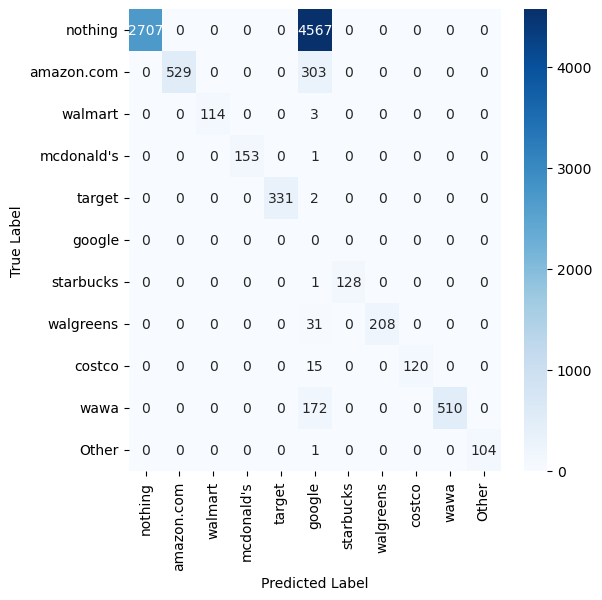

torrid: 1
trugreen: 1
hogan: 1
marriott: 1
wynn: 1
supervalu: 1
stamps.com: 1
my pillow: 1
fromyouflowers.com: 1
highmark: 1


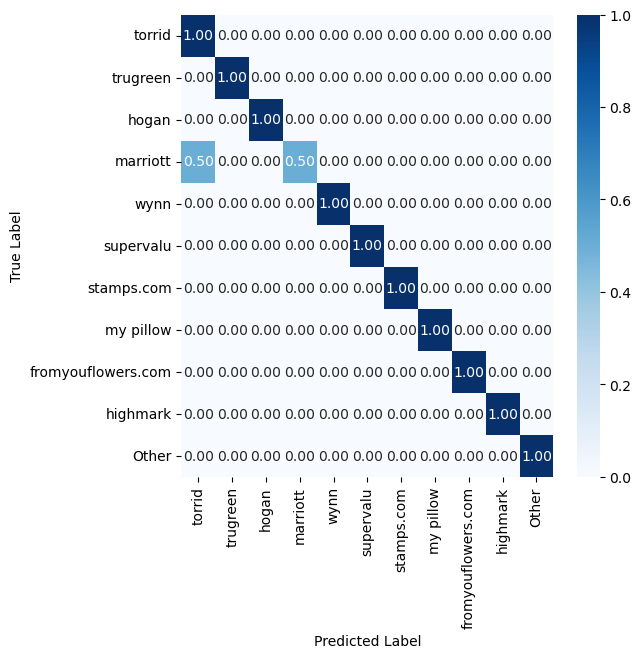

In [56]:
c_matrix(predicted_labels, true_labels)

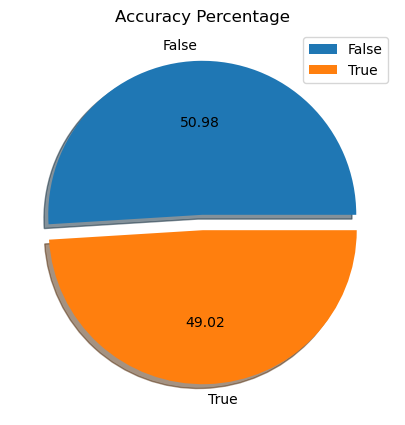

In [57]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df_known_merchs_pred.groupby('CHECK_TF').size().plot(kind='pie', autopct='%.2f', title='Accuracy Percentage', explode=[0.05, 0.05], legend=True, shadow=True)
ax1.set_ylabel('', size=10);


In [58]:
(df_known_merchs_pred.CHECK_TF).value_counts()

False    5098
True     4902
Name: CHECK_TF, dtype: int64

# ML Models - Labelling
- Created different classification models for labelling
    - Multinomial Naive Bayes
    - Linear SVC
    - K-Nearest Neighbors

In [59]:
df_known_class_pred = df_known_merchs[['transaction_id','TRANSACTION_DETAILS','AFS_MECHANT_NAMES']].copy(deep=True)
df_known_class_pred['AFS_MECHANT_NAMES'] = df_known_class_pred['AFS_MECHANT_NAMES'].str.lower()
df_known_class_pred['TRANSACTION_DETAILS']= df_known_class_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [60]:
df_known_class_pred.head(10)

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
116120,Tc1f933c105bc34d6a8e384a6165ce0b4,dda pur wal-mart %%%%% 3701 portage road south bend in,walmart
578943,T165ac547d60a3828903b3ab75b1e4073,dbt purchase on 11/12 17:55 %%%%% safeway 0526 kirkland wa card nbr: -0216,safeway
904417,T54ffc905ff3235dda852ddf7708b9141,withdrawal %%%%% circle k 09183 chandler az,circle k
1465425,T47e418300bac35f6ac4a0a317c9b253b,pos purchase wm superc wal-mart %%%%% sup springhill la 8271 02/19,walmart
434009,T59f5071292913b5a9d8191160def8a34,withdrawal wm supercenter 174 %%%%% cocoa us %% card 25 4758 %% mcc 5411,walmart
428562,Tc2421fadc5473ed5a806648cf219b616,withdrawal %%%%% harris teeter 0 6351 columbia pike falls church va %% card 10 3482,harris teeter
280847,Te3647a4c417d32fa8bc5ff46362d56dc,dda pur bp 0 %%%%% bp 0the j wanatah in,bp amoco
250360,Te375a3aa9fe1372cbcc11ecc014b8873,point of sale withdrawal %%%%% amazon.com seattle waus,amazon.com
401072,Tfb86d816fe85383489969e039094f937,withdrawal google ketchapp %%%%% mountain view ca %% card 15 6340,google
266685,Tc756df8606873d31b5edc70b04528cb7,kfc g suwanee %%%%% gaus : pos transaction,kfc


In [61]:
def top_hists(t_pred, t_test):
    
    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # get the top 10 labels and their counts
    top_10_labels = sorted_labels[:10]
    top_10_counts = [value_counts[label] for label in top_10_labels]

    # create the horizontal bar plot
    plt.figure(figsize=(6,6))
    sns.barplot(x=top_10_counts, y=top_10_labels, orient='h')
    plt.title('Histogram of Top 10 Labels')
    plt.xlabel('Count')
    plt.ylabel('Label')
    plt.show()
    
    #=========================================================================================
    

    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # get the top 10 predicted labels and their counts
    top_10_labels = sorted_labels[:10]
    top_10_counts = [value_counts[label] for label in top_10_labels]

    # create a horizontal bar plot for the top 10 predicted labels
    plt.figure(figsize=(6,6))
    plt.barh(range(len(top_10_labels)), top_10_counts, align='center')
    plt.yticks(range(len(top_10_labels)), top_10_labels)
    plt.xlabel('Count')
    plt.ylabel('Predicted Label')
    plt.title('Top 10 Predicted Labels')
    plt.show()
    
    #=========================================================================================
    

    # count the number of occurrences of each predicted label
    value_counts = Counter(t_pred)

    # sort the labels by ascending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=False)

    # get the least 10 predicted labels and their counts
    least_10_labels = sorted_labels[:10]
    least_10_counts = [value_counts[label] for label in least_10_labels]

    # create a horizontal bar plot for the least 10 predicted labels
    plt.figure(figsize=(6,6))
    plt.barh(range(len(least_10_labels)), least_10_counts, align='center')
    plt.yticks(range(len(least_10_labels)), least_10_labels)
    plt.xlabel('Count')
    plt.ylabel('Predicted Label')
    plt.title('Least 10 Predicted Labels')
    plt.show()

    return

In [62]:
def df_description(clss, a_test,a_pred,a_train,b_train,b_test):     
    #(classifier, y_test, y_pred, y_train,X_train,X_test)
    
    print('Accuracy : {0:0.3f}'.format(accuracy_score(a_test, a_pred)))
    
    #========================================================================================================================
    
    
    print('Number of unique merchants in the test set: ', len(a_test.unique()))
    print('Number of unique merchants in the predicted set: ', len(np.unique(a_pred)))
    print('Number of unique merchants in train set: ', len(a_train.unique()))
    print('\nNumber of unique "Transaction Details" rows in test set: ', len(b_train.unique()))
    print('Number of unique "Transaction Details" rows in train set: ', len(b_test.unique()))
    print('\nTotal number of rows in the train set: ', len(b_train))
    print('Total number of rows in the test set', len(b_test))
    
    
    train_acc = accuracy_score(a_train, clss.predict(b_train))
    test_acc = accuracy_score(a_test, a_pred)
    print("Train accuracy:", train_acc)
    print("Test accuracy:", test_acc)
    
    
    #========================================================================================================================
    
    
    # Get the classification report as a string
    report_dict = metrics.classification_report(a_test, a_pred, zero_division=0, output_dict=True)

    # Convert the report dictionary to a pandas dataframe
    report_data = pd.DataFrame(report_dict).transpose()
    
    precision_count = (report_data['precision'] == 1).sum()
    total_categories = report_data.shape[0]
    precision_percentage = precision_count / total_categories * 100
    
    print('\n===================================\n')
    print('Percentage of best precision', precision_percentage)
    
    recall_count = (report_data['recall'] == 1).sum()
    total_categories = report_data.shape[0]
    recall_percentage = recall_count / total_categories * 100
    print('===================================\n')
    print('Percentage of best recall', recall_percentage)
    
    f1score_count = (report_data['f1-score'] == 1).sum()
    total_categories = report_data.shape[0]
    f1score_percentage = f1score_count / total_categories * 100
    print('===================================\n')
    print('Percentage of best f1score', f1score_percentage)
    
    print('===================================\n')
    
    
    top_hists(a_pred, a_test)
    c_matrix(a_pred, a_test)
    
    return
    
    

In [63]:
def c_matrix(a_pred, a_test):

    # count the number of occurrences of each predicted label
    value_counts = Counter(a_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # print the top 10 labels by count
    for label in sorted_labels[:10]:
        print(f"{label}: {value_counts[label]}")
    

    # get the indices of the top 10 predicted values
    top_10_labels = sorted_labels[:10]

    # filter the true and predicted labels to only include the top 10 labels
    top_10_true = [label if label in top_10_labels else "Other" for label in a_test]
    top_10_pred = [label if label in top_10_labels else "Other" for label in a_pred]

    # create the confusion matrix
    cm = confusion_matrix(top_10_true, top_10_pred, normalize='true')

    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=top_10_labels + ["Other"], yticklabels=top_10_labels + ["Other"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    
    #========================================================================================================================
    

    # sort the labels by ascending order of count
    sorted_labels2 = sorted(value_counts, key=value_counts.get, reverse=False)

    # print the 10 least predicted labels by count
    for label2 in sorted_labels2[:10]:
        print(f"{label2}: {value_counts[label2]}")
    

    # get the indices of the top 10 predicted values
    least_10_labels = sorted_labels2[:10]

    # filter the true and predicted labels to only include the top 10 labels
    least_10_true = [label2 if label2 in least_10_labels else "Other" for label2 in a_test]
    least_10_pred = [label2 if label2 in least_10_labels else "Other" for label2 in a_pred]

    # create the confusion matrix
    cm = confusion_matrix(least_10_true, least_10_pred, normalize='true')

    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt=".2f", xticklabels=least_10_labels + ["Other"], yticklabels=least_10_labels + ["Other"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    return

In [64]:
def l_curve(clss, xt, yt):
    #classifier, X_train_oversampled,y_train_oversampled
    
    train_sizes, train_scores, test_scores = learning_curve(
        clss, xt[:, 0], yt, cv=5, scoring='f1_macro', 
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=99
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
    return

In [65]:

def train(classifier, X, y):
    

    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)        
    
    # Random over-sampling due to imbalanced classes
    resampler = RandomOverSampler(random_state=0)
    X_train_oversampled, y_train_oversampled = resampler.fit_resample(X_train.to_numpy().reshape(-1, 1), y_train)
    #sns.countplot(x=y_train_oversampled)  
    
    l_curve(classifier, X_train_oversampled, y_train_oversampled)
  
  
    classifier.fit(X_train_oversampled[:, 0], y_train_oversampled)                                                      
    end = time.time()                                                                                
    
    y_pred = classifier.predict(X_test) 
  
  
    df_description(classifier, y_test, y_pred, y_train,X_train,X_test)
    # top_hists(y_pred, y_test)
    # c_matrix(y_pred, y_test)
    
    
    print('\n\n', metrics.classification_report(y_test, y_pred))
    
    return classifier


In [66]:
df_known_class_pred

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
116120,Tc1f933c105bc34d6a8e384a6165ce0b4,dda pur wal-mart %%%%% 3701 portage road south bend in,walmart
578943,T165ac547d60a3828903b3ab75b1e4073,dbt purchase on 11/12 17:55 %%%%% safeway 0526 kirkland wa card nbr: -0216,safeway
904417,T54ffc905ff3235dda852ddf7708b9141,withdrawal %%%%% circle k 09183 chandler az,circle k
1465425,T47e418300bac35f6ac4a0a317c9b253b,pos purchase wm superc wal-mart %%%%% sup springhill la 8271 02/19,walmart
434009,T59f5071292913b5a9d8191160def8a34,withdrawal wm supercenter 174 %%%%% cocoa us %% card 25 4758 %% mcc 5411,walmart
...,...,...,...
181448,T4567b5f9e3c73e2dbab3cf715bd46e95,withdrawal visa check card %%%%% love's 359 emerson ga date 02/26/23 87582 5541 %% mcc 5541,loves travel & country stores
444398,Tece276f75bd03421b3d1358ca3f2c71d,withdrawal sears online %%%%% type: payment id: citictp co: sears online name: kelly a balliet %% ach ecc web %% ach trace 666,sears
1467831,T67b90ccb9af8350395b8f574a75fd03f,purchase kwik shop 0713 5700 %%%%% swtopeka ksus,kwik shop
1402431,T57fccd1827fc3b6d8d10eadbe48c8006,withdrawal debit card %%%%% starbucks 800-782-7282 800-782-7282 wa date 11/16/22 75874 5814,starbucks


- Multinomial Naive Bayes

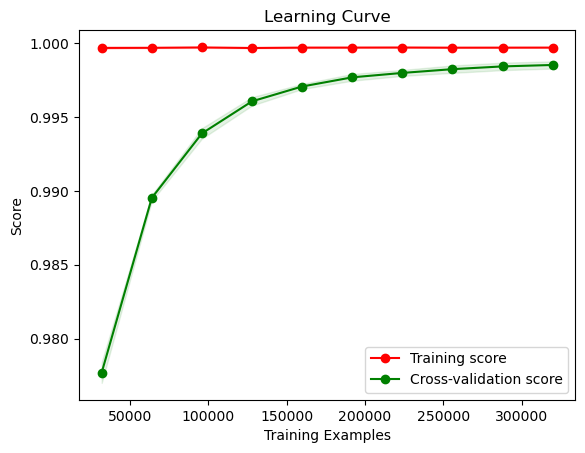

Accuracy : 0.502
Number of unique merchants in the test set:  357
Number of unique merchants in the predicted set:  294
Number of unique merchants in train set:  609

Number of unique "Transaction Details" rows in test set:  7666
Number of unique "Transaction Details" rows in train set:  1966

Total number of rows in the train set:  8000
Total number of rows in the test set 2000
Train accuracy: 0.9985
Test accuracy: 0.502


Percentage of best precision 16.46489104116223

Percentage of best recall 15.738498789346247

Percentage of best f1score 9.927360774818402



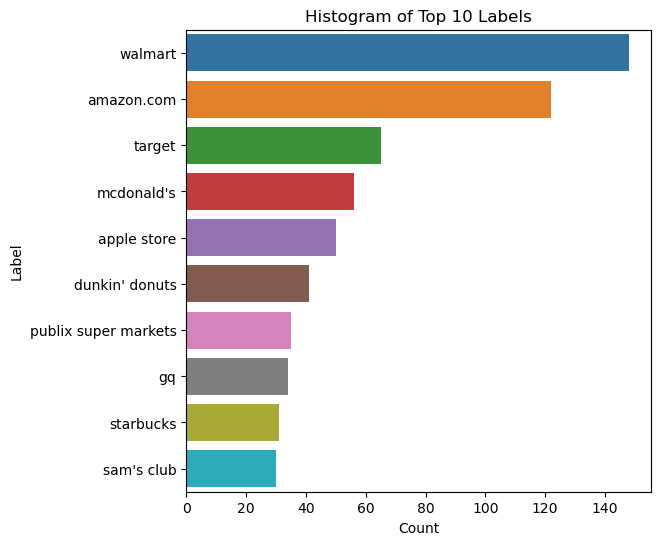

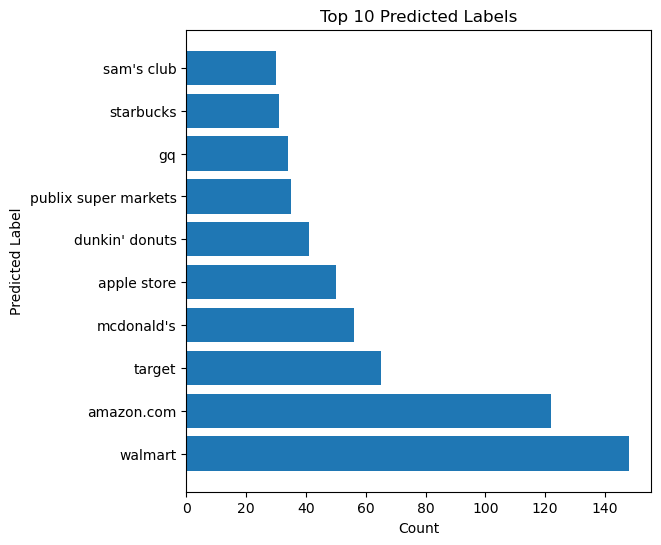

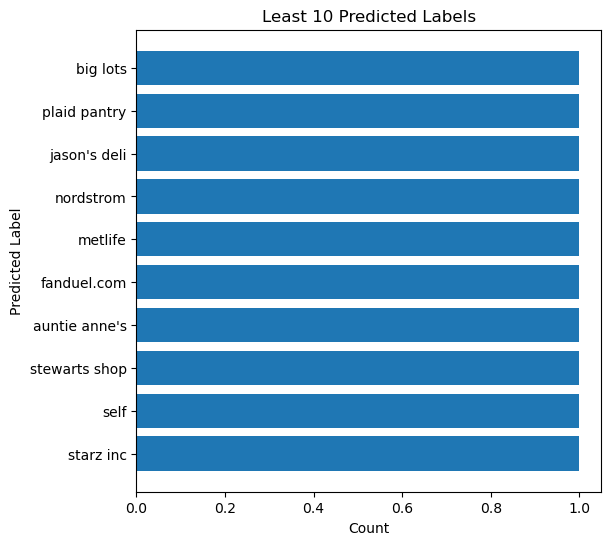

walmart: 148
amazon.com: 122
target: 65
mcdonald's: 56
apple store: 50
dunkin' donuts: 41
publix super markets: 35
gq: 34
starbucks: 31
sam's club: 30


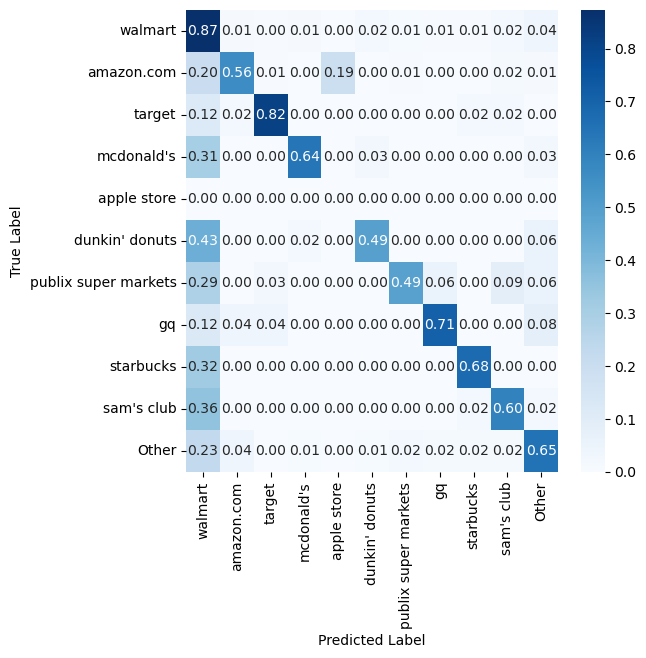

starz inc: 1
self: 1
stewarts shop: 1
auntie anne's: 1
fanduel.com: 1
metlife: 1
nordstrom: 1
jason's deli: 1
plaid pantry: 1
big lots: 1


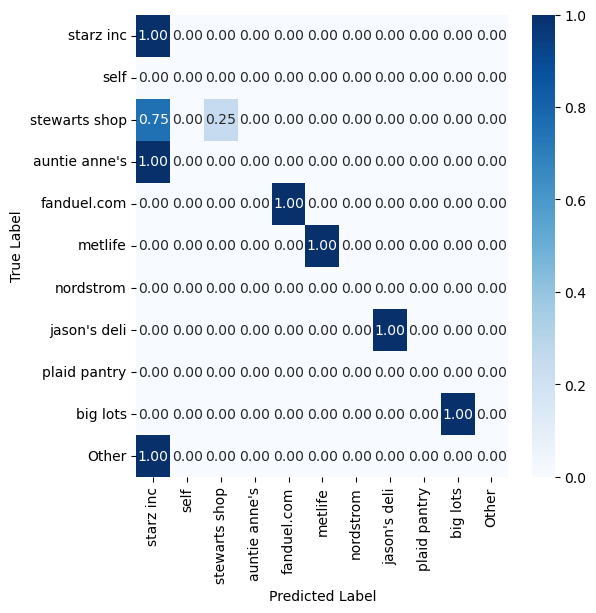



                                     precision    recall  f1-score   support

                          7 eleven       0.60      0.44      0.51        27
                     abc fine wine       0.00      0.00      0.00         1
         academy sports + outdoors       1.00      0.25      0.40         4
                      ace hardware       0.00      0.00      0.00         1
                      acme markets       0.50      0.50      0.50         2
                advance auto parts       0.00      0.00      0.00         3
                             aetna       1.00      1.00      1.00         1
                             aflac       0.50      1.00      0.67         1
                            airbnb       1.00      1.00      1.00         1
                        albertsons       0.50      0.44      0.47         9
                              aldi       0.50      0.50      0.50        10
                          allstate       1.00      0.67      0.80         3
        

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

In [67]:
from sklearn.preprocessing import StandardScaler
# ss = StandardScaler().fit(df_known_class_pred['TRANSACTION_DETAILS'])
# Xa = ss.transform(df_known_class_pred['TRANSACTION_DETAILS'])

classifier1 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))), # 
                        ('scaler', StandardScaler(with_mean=False)),
                        ('classifier', MultinomialNB(alpha=0.005))])

train(classifier1, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])
# train(classifier1, Xa, df_known_class_pred['AFS_MECHANT_NAMES'])

MNB = cls_acc
Mtime = cls_time
# print("\n\nMNB: ", MNB)
# print("Time: ", Mtime)



- Linear SVC

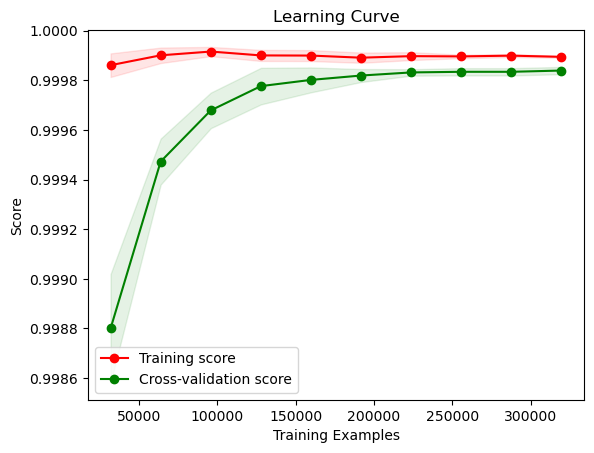

Accuracy : 0.934
Number of unique merchants in the test set:  357
Number of unique merchants in the predicted set:  322
Number of unique merchants in train set:  609

Number of unique "Transaction Details" rows in test set:  7666
Number of unique "Transaction Details" rows in train set:  1966

Total number of rows in the train set:  8000
Total number of rows in the test set 2000
Train accuracy: 0.9995
Test accuracy: 0.934


Percentage of best precision 57.8005115089514

Percentage of best recall 65.21739130434783

Percentage of best f1score 52.17391304347826



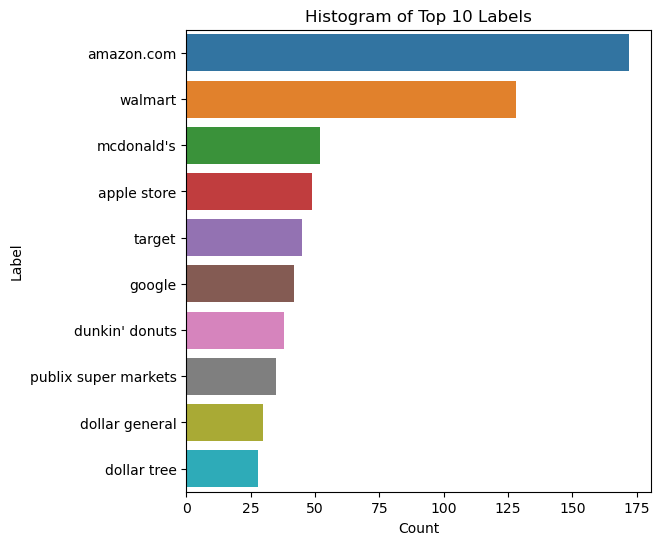

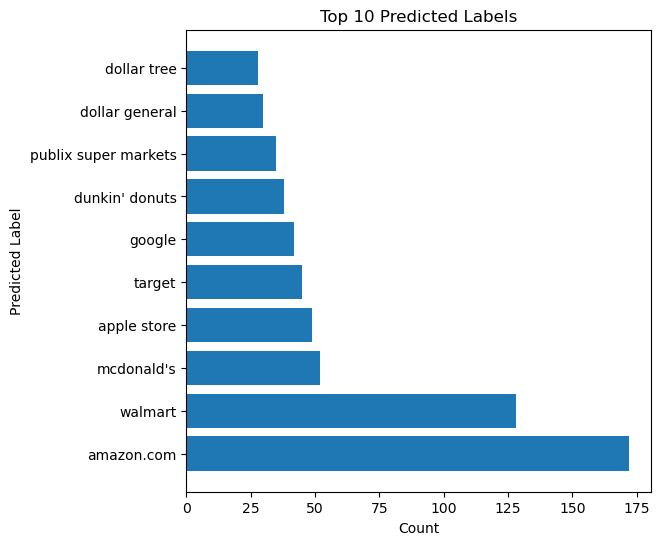

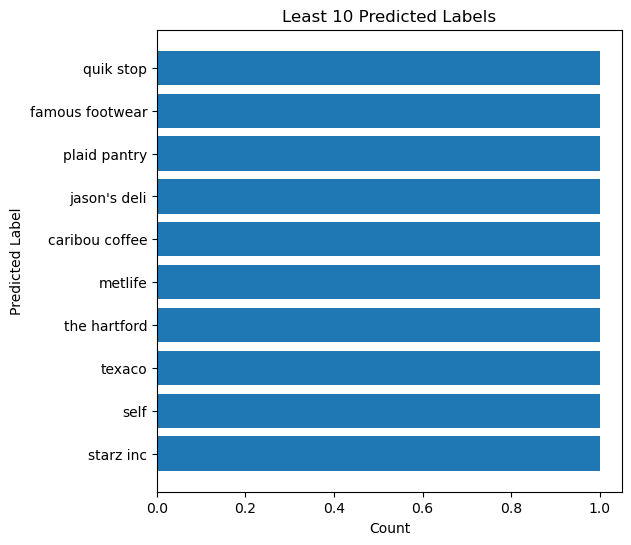

amazon.com: 172
walmart: 128
mcdonald's: 52
apple store: 49
target: 45
google: 42
dunkin' donuts: 38
publix super markets: 35
dollar general: 30
dollar tree: 28


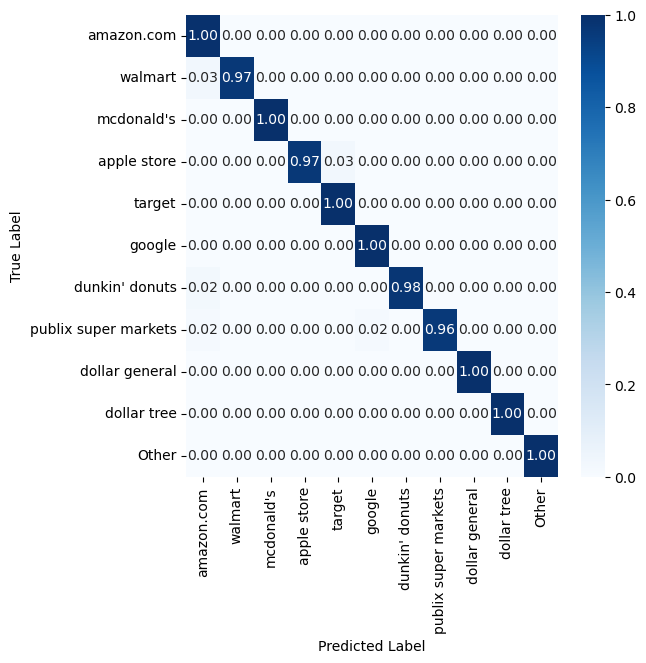

starz inc: 1
self: 1
texaco: 1
the hartford: 1
metlife: 1
caribou coffee: 1
jason's deli: 1
plaid pantry: 1
famous footwear: 1
quik stop: 1


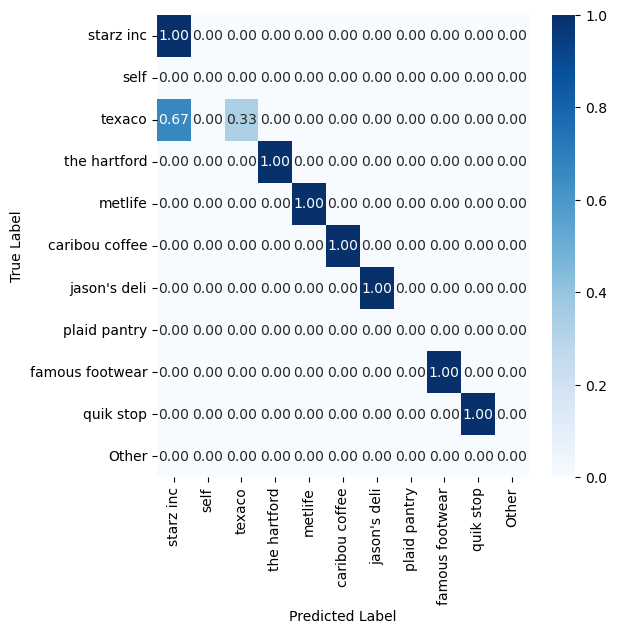



                                     precision    recall  f1-score   support

                          7 eleven       0.96      1.00      0.98        27
                     abc fine wine       1.00      1.00      1.00         1
         academy sports + outdoors       1.00      1.00      1.00         4
                      ace hardware       0.50      1.00      0.67         1
                      acme markets       1.00      1.00      1.00         2
                advance auto parts       1.00      0.67      0.80         3
                             aetna       1.00      1.00      1.00         1
                             aflac       0.50      1.00      0.67         1
                            airbnb       1.00      1.00      1.00         1
                        albertsons       1.00      1.00      1.00         9
                              aldi       1.00      1.00      1.00        10
                          allstate       1.00      1.00      1.00         3
        

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

In [68]:
from sklearn.svm import LinearSVC

classifier2 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))), #('scaler', StandardScaler(with_mean=False)),
                        ('classifier', LinearSVC(C=1.0))])

train(classifier2, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

SVC = cls_acc
Stime = cls_time
# print("\n\nSVC: ", SVC)
# print("Time: ", Stime)


In [69]:
from sklearn.linear_model import SGDClassifier

classifier = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=1000, tol=1e-3)),
])

train(classifier, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

- K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier4 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),
                        ('classifier', KNeighborsClassifier(n_neighbors=5))])

train(classifier4, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

KNN = cls_acc
Ktime = cls_time
print("\n\nKNN: ", KNN)
print("Time: ", Ktime)


# Payment Agents VS Merchant Names
- Selected known payment agents
- Checked number of total occurences per agents
- Checked total number of payment agents
- Checked number of transactions with known payment agents
- Defined a function compare payment agents with merchant names
- Created CHECK_MERCH_AGTS to check when agents and merchants are same
- Checked Totals for different situations

In [ ]:
df_known_payment_agents = df_known_merchs.copy(deep=True)
# Known payment agent names
df_known_payment_agents = df_known_payment_agents.loc[df_known_payment_agents['AFS_PAYMENT_AGENTS'] != 'Unknow Payment Agent']
df_known_payment_agents

In [ ]:
print('Number of total occurences per payment agents:\n', (df_known_payment_agents.AFS_PAYMENT_AGENTS).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

In [ ]:
print('Total number of payment agents:\n',len(df_known_payment_agents.AFS_PAYMENT_AGENTS.unique()))

In [ ]:
print('Number of transactions with known payment agents:\n',len(df_known_payment_agents))

In [ ]:
# Function to compare payment agent names with merchant names
def compare_occurences(agent, merchant):
    agent = agent.split()
    merchant = merchant.split()
    # Conditions to check if words are in transaction strings
    if (merchant in agent or agent in merchant or
        (any(item in merchant for item in agent)) or
        (merchant[:3] in agent)):
        return True
    else:
        return False

In [ ]:
# Checking if merchant names and payment agents are same
df_known_payment_agents['CHECK_MERCH_AGTS'] = df_known_payment_agents.apply(lambda x: compare_occurences(x.AFS_MECHANT_NAMES, x.AFS_PAYMENT_AGENTS), axis=1)
df_known_payment_agents.head()

- Checked how many times merchant names and payment agents are same
- Checked how many time merchant names and payment agents are different
- Checked total number of transactions with known agents

In [ ]:
print('Same merchant names and payment agents:\n',len(df_known_payment_agents.loc[df_known_payment_agents['CHECK_MERCH_AGTS']==True]))

In [ ]:
print('Merchant names and payment agents are diferent:\n',len(df_known_payment_agents.loc[df_known_payment_agents['CHECK_MERCH_AGTS']==False]))

In [ ]:
print('Number of rows with known Agents:\n',len(df_known_payment_agents))

In [ ]:
df_known_payment_agents